In [13]:
import numpy as np
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import scipy.stats as sp
import pandas as pd
import xarray as xr
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.patches as mpatches

In [21]:
filename = f"Output/DDHWSF_Forecasts_LR_19792021.csv"
df_DDHWSF = pd.read_csv(filename)     # Skip comment lines that start with #
preds_DDHWSF=df_DDHWSF.NDQ90_predictions[1993-1979:2017-1979]
print (df_DDHWSF.NDQ90_predictions[1993-1979:2017-1979])
dataset=Dataset("Output/NumberHWdays_ERA5_Cluj-Napoca.nc",'r') 
target_ERA5=dataset['NumberHWDays'][1993-1940:2017-1940]

14     3.949750
15     4.740421
16     5.517271
17     6.220849
18    10.788137
19     7.135342
20     9.486646
21    11.741810
22     4.615390
23     5.623715
24    15.276000
25     9.556744
26     9.629065
27    10.913298
28    15.051624
29    13.555272
30    12.742729
31     4.851767
32    13.552208
33     9.772323
34     7.085024
35    12.140607
36    12.664680
37    11.703452
Name: NDQ90_predictions, dtype: float64


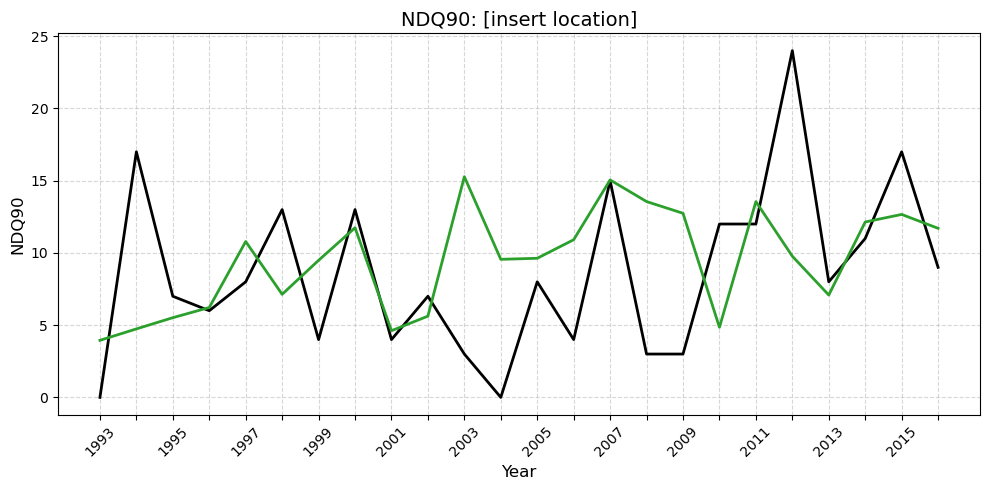

(0.08836454204144542, 0.6813722443357386)


In [22]:
plt.figure(figsize=(10, 5))

# Generate x-axis
years = range(1993, 2017)

#era5=np.mean(target_2D[:, i_y1:i_y2, i_x1:i_x2], axis=(1, 2))
#C3S_MM=np.mean(MM[:, :,i_y1:i_y2, i_x1:i_x2], axis=(2, 3))

#plt.boxplot(C3S_MM, positions=years, widths=0.4, patch_artist=True,
#            boxprops=dict(facecolor='lightblue', color='navy',alpha=0.5),
#            medianprops=dict(color='darkblue'),
#            whiskerprops=dict(color='navy'),
#            capprops=dict(color='navy'),
#            flierprops=dict(marker='o', markersize=3, linestyle='none', markerfacecolor='gray', alpha=0.5))

# Plot each line with labels
target_line,=plt.plot(
    years,
    target_ERA5,
    'k-',
    label='Target (ERA5)',
    linewidth=2
)

dd_line,=plt.plot(
    years,
    preds_DDHWSF,
    color='tab:green',
    label='DDHWSF',
    linestyle='-',
    linewidth=2
)

# Add grid, legend, and labels
plt.grid(True, linestyle='--', alpha=0.5)

box_legend = mpatches.Patch(facecolor='lightblue', edgecolor='navy', label='C3S Ensemble')
#plt.legend(handles=[target_line, dd_line, dd_line2, dd_line3, box_legend])

plt.xlabel('Year', fontsize=12)
plt.ylabel('NDQ90', fontsize=12)
plt.title('NDQ90: [insert location]', fontsize=14)
plt.xticks(ticks=years, labels=[str(y) if y % 2 == 1 else "" for y in years], rotation=45)
plt.tight_layout()

plt.show()

print (sp.pearsonr(target_ERA5,preds_DDHWSF))